# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [95]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import csv
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

In [26]:
cities

['sao joao da barra',
 'punta arenas',
 'albany',
 'mamou',
 'mataura',
 'sitka',
 'hilo',
 'cap malheureux',
 'ponta do sol',
 'dangriga',
 'pilot butte',
 'kruisfontein',
 'taolanaro',
 'hobart',
 'pimentel',
 'halalo',
 'kavaratti',
 'bambous virieux',
 'svetlogorsk',
 'chuy',
 'jamestown',
 'tuktoyaktuk',
 'mys shmidta',
 'monrovia',
 'hermanus',
 'huichapan',
 'lorengau',
 'georgetown',
 'pangai',
 'puerto del rosario',
 'mar del plata',
 'sur',
 'kaitangata',
 'busselton',
 'skagastrond',
 'kazalinsk',
 'mogadishu',
 'sinnamary',
 'vao',
 'gornopravdinsk',
 'the valley',
 'bredasdorp',
 'ushuaia',
 'rikitea',
 'east london',
 'cabra',
 'puerto ayora',
 'kencong',
 'nahrin',
 'nanortalik',
 'sentyabrskiy',
 'port elizabeth',
 'saskylakh',
 'tiksi',
 'atuona',
 'tukrah',
 'san patricio',
 'nikolskoye',
 'kharitonovo',
 'dunedin',
 'alice springs',
 'avarua',
 'malanje',
 'pevek',
 'khatanga',
 'bethel',
 'new norfolk',
 'carroll',
 'uvira',
 'qaanaaq',
 'menongue',
 'vilcun',
 'vai

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [33]:
url="http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

City_name_list=[]
Lat_list=[]
Lng_list=[]
Max_Temp_list=[]
Humidity_list=[]
Cloud_list=[]
Wind_Speed_list=[]
Country_list=[]
Date_list=[]
cntr=0
ex_cntr=0
print('Beginning Data Retrieval')
for city in cities :
    response=requests.get(query_url + city).json()
    #city_name=
    try:
        City_name_list.append(response['name'])
        Lat_list.append(response['coord']['lat'])
        Lng_list.append(response['coord']['lon'])
        Max_Temp_list.append(response['main']['temp_max'])
        Humidity_list.append(response['main']['humidity'])
        Cloud_list.append(response['clouds']['all'])
        Wind_Speed_list.append(response['wind']['speed'])
        Country_list.append(response['sys']['country'])
        Date_list.append(response['dt'])
        cntr=cntr+1
        print(f'Processing Record {cntr} | {city}')
    except:
        print("That record does not exist, searching for next record...")
        ex_cntr=ex_cntr+1
print(f'Number of records processed:{cntr}')
print(f'Number of records that does not exist:{ex_cntr}')

Beginning Data Retrieval
Processing Record 1 | atuona
Processing Record 2 | batemans bay
Processing Record 3 | mataura
Processing Record 4 | hithadhoo
Processing Record 5 | nikolskoye
Processing Record 6 | faanui
Processing Record 7 | beyneu
Processing Record 8 | invermere
Processing Record 9 | carutapera
Processing Record 10 | egvekinot
Processing Record 11 | albany
Processing Record 12 | meulaboh
Processing Record 13 | hobart
Processing Record 14 | port elizabeth
Processing Record 15 | chara
Processing Record 16 | westport
Processing Record 17 | rikitea
Processing Record 18 | kapaa
Processing Record 19 | cidreira
Processing Record 20 | kantang
Processing Record 21 | hilo
Processing Record 22 | jamestown
Processing Record 23 | port alfred
Processing Record 24 | lompoc
Processing Record 25 | maturin
Processing Record 26 | provideniya
Processing Record 27 | vaini
Processing Record 28 | ilulissat
Processing Record 29 | busselton
Processing Record 30 | saint-philippe
Processing Record 31 

Processing Record 220 | airai
Processing Record 221 | iquique
Processing Record 222 | broome
Processing Record 223 | norman wells
Processing Record 224 | itarema
Processing Record 225 | nhulunbuy
That record does not exist, searching for next record...
Processing Record 226 | denham springs
Processing Record 227 | tuatapere
Processing Record 228 | solomenskoye
Processing Record 229 | cayenne
Processing Record 230 | catemaco
Processing Record 231 | yulara
Processing Record 232 | nome
Processing Record 233 | longyearbyen
Processing Record 234 | victoria
Processing Record 235 | mustasaari
That record does not exist, searching for next record...
Processing Record 236 | san quintin
Processing Record 237 | sawtell
Processing Record 238 | touros
Processing Record 239 | te anau
Processing Record 240 | sukumo
Processing Record 241 | aktash
That record does not exist, searching for next record...
Processing Record 242 | upernavik
Processing Record 243 | mehamn
Processing Record 244 | trairi
Proc

Processing Record 440 | zandvoort
Processing Record 441 | srednekolymsk
Processing Record 442 | bandarbeyla
Processing Record 443 | tual
Processing Record 444 | edd
Processing Record 445 | jijiga
Processing Record 446 | san angelo
Processing Record 447 | la libertad
Processing Record 448 | teahupoo
Processing Record 449 | matay
Processing Record 450 | zheleznodorozhnyy
Processing Record 451 | yumen
Processing Record 452 | rajanpur
Processing Record 453 | leningradskiy
Processing Record 454 | barguzin
Processing Record 455 | teya
Processing Record 456 | mana
Processing Record 457 | toora-khem
Processing Record 458 | dudinka
Processing Record 459 | bilibino
Processing Record 460 | loandjili
Processing Record 461 | namwala
Processing Record 462 | anchorage
Processing Record 463 | elko
Processing Record 464 | priargunsk
Processing Record 465 | isiro
Processing Record 466 | navalmoral de la mata
Processing Record 467 | amol
Processing Record 468 | keti bandar
Processing Record 469 | samoded

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [74]:
#Creating dataFrame
City_df=pd.DataFrame({'City':City_name_list,
              'Lat':Lat_list,'Lng':Lng_list,
                'Max Temp':Max_Temp_list,'Humidity':Humidity_list,
                'Cloudiness':Cloud_list,'Wind Speed':Wind_Speed_list,
                'Country':Country_list,'Date':Date_list})
City_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,77.72,73,44,19.62,PF,1632174982
1,Batemans Bay,-35.7167,150.1833,50.13,50,12,7.76,AU,1632174983
2,Mataura,-46.1927,168.8643,45.37,97,100,0.96,NZ,1632174983
3,Hithadhoo,-0.6000,73.0833,82.99,73,84,11.45,MV,1632174983
4,Nikolskoye,59.7035,30.7861,44.49,73,97,7.65,RU,1632174984


In [75]:
#Export the city data into a .csv.
City_df.to_csv("../Output/CityWeatherData.csv",index=False ,header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [76]:
#Checking for Cities with Humidity >100%
Humdity_data=City_df.loc[City_df['Humidity']>100,:]
if len(Humdity_data) ==0:
    print(f'No cities found with Humidity>100%')

No cities found with Humidity>100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [77]:
City_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

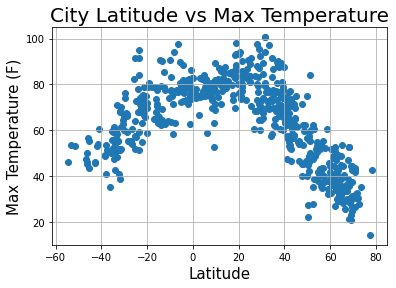

In [69]:
x_values=City_df['Lat']
y_values=City_df['Max Temp']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Max Temperature',fontsize = 20)
plt.xlabel('Latitude',fontsize = 15)
plt.ylabel('Max Temperature (F)',fontsize = 15)
plt.grid()
plt.savefig('../Output/LatMaxTemp.png')
plt.show()

## Latitude vs. Humidity Plot

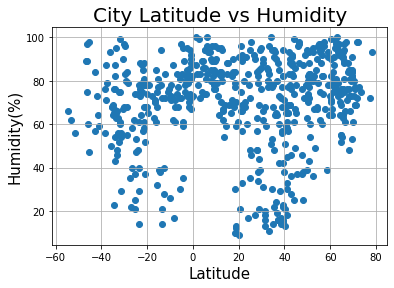

In [71]:
x_values=City_df['Lat']
y_values=City_df['Humidity']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Humidity',fontsize = 20)
plt.xlabel('Latitude',fontsize = 15)
plt.ylabel('Humidity(%)',fontsize = 15)
plt.grid()
plt.savefig('../Output/LatHumidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

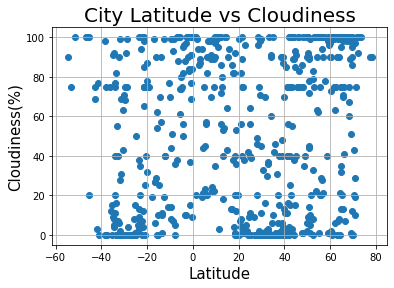

In [73]:
x_values=City_df['Lat']
y_values=City_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Cloudiness',fontsize = 20)
plt.xlabel('Latitude',fontsize = 15)
plt.ylabel('Cloudiness(%)',fontsize = 15)
plt.grid()
plt.savefig('../Output/LatCloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

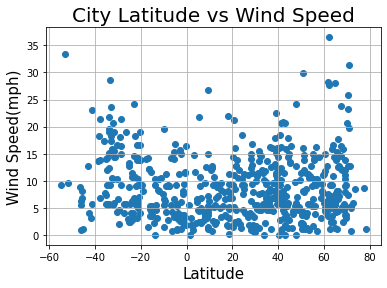

In [79]:
x_values=City_df['Lat']
y_values=City_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Wind Speed',fontsize = 20)
plt.xlabel('Latitude',fontsize = 15)
plt.ylabel('Wind Speed(mph)',fontsize = 15)
plt.grid()
plt.savefig('../Output/LatWindSpeed.png')
plt.show()

## Linear Regression

In [143]:
#Finding out Northern hemisphere vs Southern Hemisphere
North_Hemi=City_df.loc[City_df['Lat']>0,:]
South_Hemi=City_df.loc[City_df['Lat']<0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is :-0.04096885601612327


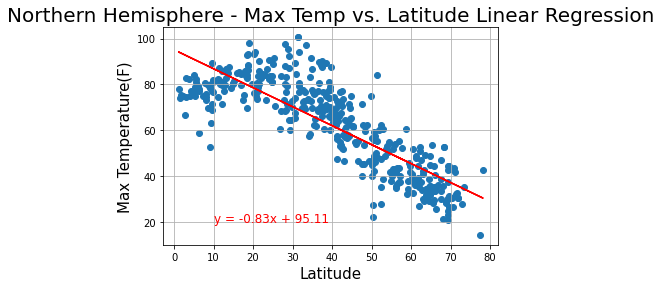

In [103]:
x_value=North_Hemi['Lat']
y_value=North_Hemi['Max Temp']
result=linregress(x_value,y_value)
slope,intercept=result[:2]
regressvalues=x_value*slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr = st.pearsonr(x_values, y_values)[0]
plt.scatter(x_value,y_value)
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression',fontsize = 20)
plt.xlabel('Latitude',fontsize = 15)
plt.ylabel('Max Temperature(F)',fontsize = 15)
plt.plot(x_value,regressvalues,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.grid()
print(f'The r-value is :{corr}')
plt.savefig('../Output/NHMaxTempLat_regression.png', bbox_inches = "tight")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is :-0.04096885601612327


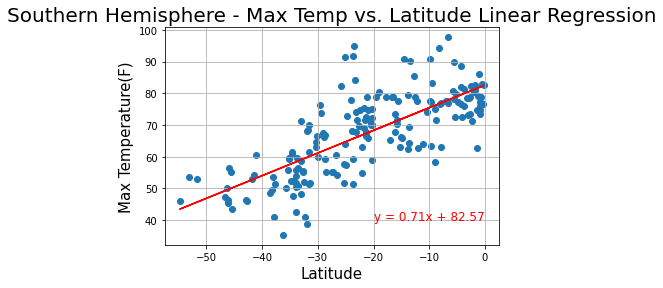

In [118]:
x_value=South_Hemi['Lat']
y_value=South_Hemi['Max Temp']
result=linregress(x_value,y_value)
slope,intercept=result[:2]
regressvalues=x_value*slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr = st.pearsonr(x_values, y_values)[0]
plt.scatter(x_value,y_value)
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression',fontsize = 20)
plt.xlabel('Latitude',fontsize = 15)
plt.ylabel('Max Temperature(F)',fontsize = 15)
plt.plot(x_value,regressvalues,"r-")
plt.annotate(line_eq,(-20,40),fontsize=12,color="red")
plt.grid()
print(f'The r-value is :{corr}')
plt.savefig('../Output/SouthHMaxTempLat_regression.png', bbox_inches = "tight")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is :-0.04096885601612327


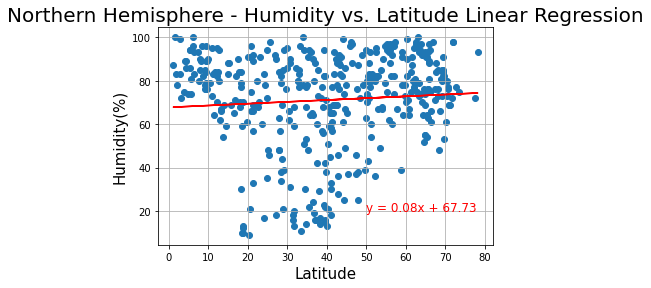

In [110]:
x_value=North_Hemi['Lat']
y_value=North_Hemi['Humidity']
result=linregress(x_value,y_value)
slope,intercept=result[:2]
regressvalues=x_value*slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr = st.pearsonr(x_values, y_values)[0]
plt.scatter(x_value,y_value)
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression',fontsize = 20)
plt.xlabel('Latitude',fontsize = 15)
plt.ylabel('Humidity(%)',fontsize = 15)
plt.plot(x_value,regressvalues,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.grid()
print(f'The r-value is :{corr}')
plt.savefig('../Output/NorthHHumidityLat_regression.png', bbox_inches = "tight")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is :-0.04096885601612327


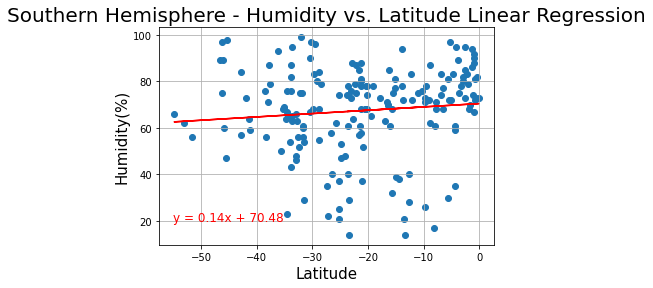

In [121]:
x_value=South_Hemi['Lat']
y_value=South_Hemi['Humidity']
result=linregress(x_value,y_value)
slope,intercept=result[:2]
regressvalues=x_value*slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr = st.pearsonr(x_values, y_values)[0]
plt.scatter(x_value,y_value,)
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression',fontsize = 20)
plt.xlabel('Latitude',fontsize = 15)
plt.ylabel('Humidity(%)',fontsize = 15)
plt.plot(x_value,regressvalues,"r-")
plt.annotate(line_eq,(-55,20),fontsize=12,color="red")
plt.grid()
print(f'The r-value is :{corr}')
plt.savefig('../Output/SouthHHumidityLat_regression.png', bbox_inches = "tight")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is :-0.04096885601612327


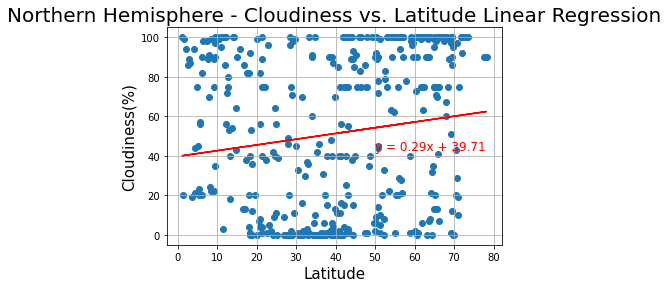

In [127]:
x_value=North_Hemi['Lat']
y_value=North_Hemi['Cloudiness']
result=linregress(x_value,y_value)
slope,intercept=result[:2]
regressvalues=x_value*slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr = st.pearsonr(x_values, y_values)[0]
plt.scatter(x_value,y_value)
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression',fontsize = 20)
plt.xlabel('Latitude',fontsize = 15)
plt.ylabel('Cloudiness(%)',fontsize = 15)
plt.plot(x_value,regressvalues,"r-")
plt.annotate(line_eq,(50,43),fontsize=12,color="red")
plt.grid()
print(f'The r-value is :{corr}')
plt.savefig('../Output/NorthHCloudinessLat_regression.png', bbox_inches = "tight")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is :-0.04096885601612327


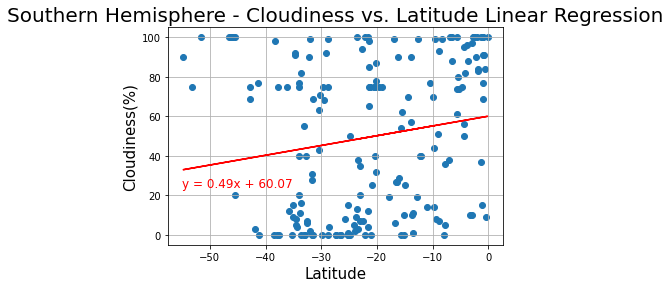

In [132]:
x_value=South_Hemi['Lat']
y_value=South_Hemi['Cloudiness']
result=linregress(x_value,y_value)
slope,intercept=result[:2]
regressvalues=x_value*slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr = st.pearsonr(x_values, y_values)[0]
plt.scatter(x_value,y_value)
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression',fontsize = 20)
plt.xlabel('Latitude',fontsize = 15)
plt.ylabel('Cloudiness(%)',fontsize = 15)
plt.plot(x_value,regressvalues,"r-")
plt.annotate(line_eq,(-55,24),fontsize=12,color="red")
plt.grid()
print(f'The r-value is :{corr}')
plt.savefig('../Output/SouthHCloudinessLat_regression.png', bbox_inches = "tight")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is :-0.04096885601612327


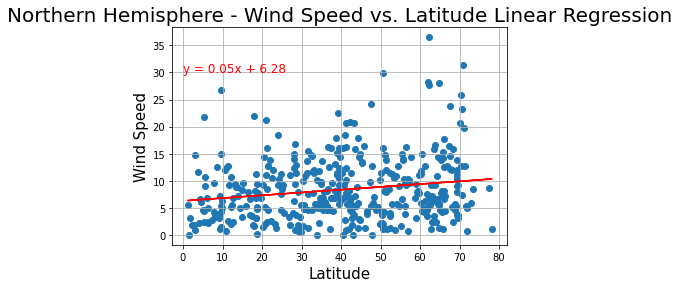

In [135]:
x_value=North_Hemi['Lat']
y_value=North_Hemi['Wind Speed']
result=linregress(x_value,y_value)
slope,intercept=result[:2]
regressvalues=x_value*slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr = st.pearsonr(x_values, y_values)[0]
plt.scatter(x_value,y_value)
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression',fontsize = 20)
plt.xlabel('Latitude',fontsize = 15)
plt.ylabel('Wind Speed',fontsize = 15)
plt.plot(x_value,regressvalues,"r-")
plt.annotate(line_eq,(0,30),fontsize=12,color="red")
plt.grid()
print(f'The r-value is :{corr}')
plt.savefig('../Output/NorthHWind_SpeedLat_regression.png', bbox_inches = "tight")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is :-0.04096885601612327


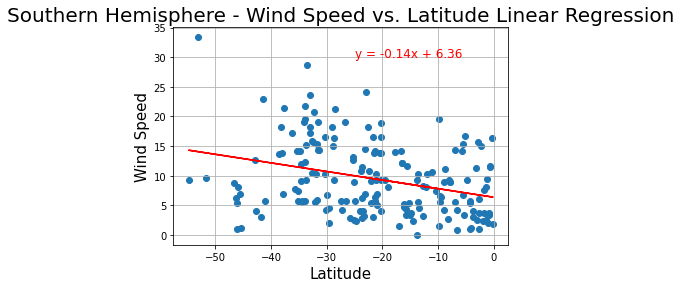

In [139]:
x_value=South_Hemi['Lat']
y_value=South_Hemi['Wind Speed']
result=linregress(x_value,y_value)
slope,intercept=result[:2]
regressvalues=x_value*slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr = st.pearsonr(x_values, y_values)[0]
plt.scatter(x_value,y_value)
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression',fontsize = 20)
plt.xlabel('Latitude',fontsize = 15)
plt.ylabel('Wind Speed',fontsize = 15)
plt.plot(x_value,regressvalues,"r-")
plt.annotate(line_eq,(-25,30),fontsize=12,color="red")
plt.grid()
print(f'The r-value is :{corr}')
plt.savefig('../Output/SouthHWind_SpeedLat_regression.png', bbox_inches = "tight")
plt.show()